In [143]:
import cv2
import pytesseract
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import re


In [144]:
img_path="passport/9.PNG"
img=cv2.imread(img_path)

In [145]:
def display(im_path):
    dpi = 200
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

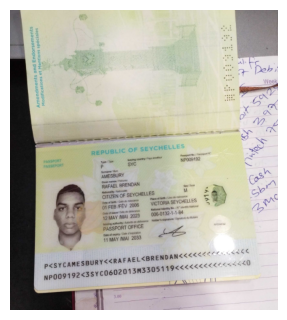

In [146]:
display("passport/9.PNG")

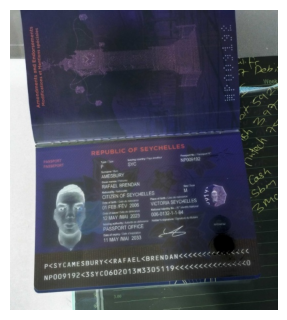

In [147]:
inverted=cv2.bitwise_not(img)
cv2.imwrite("temp_pass/pass_inverted.jpg",inverted)
display("temp_pass/pass_inverted.jpg")

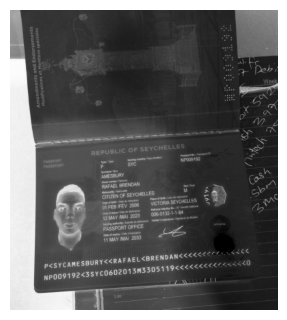

In [148]:
gray=cv2.cvtColor(inverted,cv2.COLOR_BGR2GRAY)
cv2.imwrite("temp_pass/pass_gray.jpg",gray)
display("temp_pass/pass_gray.jpg")

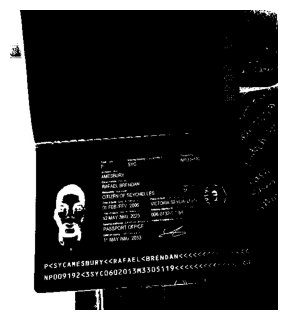

In [149]:
#thresh=cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 10)
thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
cv2.imwrite("temp_pass/bw_image.jpg",thresh)
display("temp_pass/bw_image.jpg")

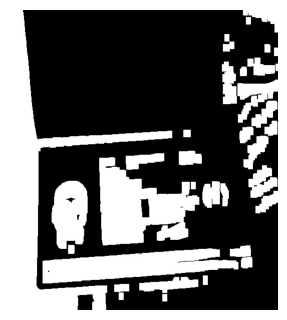

In [150]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(10,15))
dilate=cv2.dilate(thresh,kernel,iterations=1)
cv2.imwrite("temp_pass/pass_dilate.jpg",dilate)
display("temp_pass/pass_dilate.jpg")

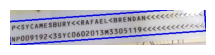

In [151]:
import numpy as np
cnts=cv2.findContours(dilate,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnts=cnts[0] if len(cnts)==2 else cnts[1]
base_img=img.copy()
cnts=sorted(cnts,key=lambda x:cv2.boundingRect(x))

for c in cnts:
    x,y,w,h=cv2.boundingRect(c)
    area=cv2.contourArea(c)
    margin=12
   
    if 20000>area>10000:
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        box = np.intp(box)
        crop=cv2.drawContours(base_img, [box], 0, (255, 0, 0), 2)

        #cv2.rectangle(base_img,(x,y),(x+w,y+h),(0,255,0),2)
        roi=base_img[y:y+h,x:x+w]
cv2.imwrite("temp_pass/pass_roi.jpg",roi)
display("temp_pass/pass_roi.jpg")

In [152]:
ocr_result=pytesseract.image_to_string(roi)
print(ocr_result)

TCRAFAEL<BRENDAN<<<<

P<SYCAMESBURY
wp009192<3S¥C0602013"33051 NIKE EES
ae




In [153]:
import easyocr
import pandas as pd
reader=easyocr.Reader(['en'], gpu=False)
results=reader.readtext(roi)
pd.DataFrame(results,columns=['bbox','text','conf'])

Using CPU. Note: This module is much faster with a GPU.


,bbox,text,conf
0,"[[0, 7], [363, 7], [363, 51], [0, 51]]",P<sycamesburt<Kratehsbosndankc4,0.011906
1,"[[0, 29], [249, 29], [249, 70], [0, 70]]",NP009192Sisyc0602018033051,0.042021
2,"[[250.2850141485749, 8.971008489144946], [348....",An<<<<<<< 4 <,0.255121
